# Introduction to Numerical Methods for Stochastic Differential Equations

### $\textbf{Author:}$ Alexandre Thyrion

__Content inspired from__:  Higham, D. J. (2001). *An algorithmic introduction to numerical simulation of stochastic differential equations*. SIAM Review, 43(3), 525–546.  
Available at: [https://epubs.siam.org/doi/10.1137/S0036144500378302](https://epubs.siam.org/doi/10.1137/S0036144500378302)


# TP1 : Bees are Flying !

## Imports 

**Important** : Run the cell below

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import requests
from io import BytesIO
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import ipywidgets as widgets
from ipywidgets import interactive_output,HBox
import matplotlib.cm as cm

def load_image_from_url(url):
    response = requests.get(url, stream=True)
    img = mpimg.imread(BytesIO(response.content), format='png')
    return img

def add_image(ax, img_array, xy, zoom=0.15):
    imagebox = OffsetImage(img_array, zoom=zoom)
    ab = AnnotationBbox(imagebox, xy, frameon=False,zorder = 0)
    ax.add_artist(ab)
    return ab

divisors = [k for k in range(1, 20000+ 1) if 20000 % k == 0]

# Convert back to time step values
valid_values = [k * 1e-5 for k in divisors]
dt_label = widgets.HTMLMath(value=r'Δt')
# Create a discrete slider with only valid R values
dt_slider = widgets.SelectionSlider(
    options=valid_values,
    description ="",
    value=1e-3*2,
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal',
    layout=widgets.Layout(width='30%')
)

url_abeille = "https://cdn-icons-png.flaticon.com/128/809/809154.png"
url_ruche = "https://cdn-icons-png.flaticon.com/128/8722/8722104.png"

img_abeille = load_image_from_url(url_abeille)
img_ruche = load_image_from_url(url_ruche)

# Bees are Flying

The first exercise consists in the implementation of a simple stochastic model, describing the movement of a bee flying towards the hive.

This case is an application of the Ornstein–Uhlenbeck process, which is defined by the following stochastic differential equation (SDE) :

\begin{equation}

dX_t = -\lambda (X_t-X^*) dt + \sigma dW_t , \quad X(0)=X_0, \quad 0\leq t \leq T ,

\end{equation}

First, we recall the traditional methods to solve ODE by neglecting the stochastic component, defined by the following expression : 

\begin{equation}
\tag{2}
dX_t = -\lambda (X_t-X^*) dt , \quad X(0)=X_0, \quad 0\leq t \leq T ,

\end{equation}

# Exercise 1A

#### **Q1** : Implement the model, and solve the ODE by using the scipy function *solve_ivp()*



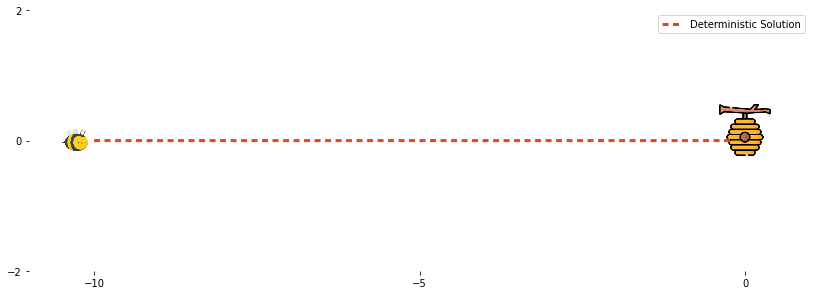

In [28]:
lambda_ = 20
sigma = 2
x_r = np.array([0.0, 0.0])
X0 = np.array([-10.0, 0])
T = .2
dt = 1e-5
N = int(T / dt)


############################
## Complete the code below #
############################

def deterministic_dynamic(t, X):
    return -lambda_ * (X - x_r)

sol = solve_ivp(deterministic_dynamic, [0, T], X0, t_eval = np.linspace(0, T, N+1), method='RK45')

######### PLOTTING #########

fig,ax = plt.subplots(figsize=(14, 8))
add_image(plt.gca(), img_abeille, X0 - np.array([.3,0]), zoom=0.2)
add_image(plt.gca(), img_ruche, x_r+ np.array([0,.15]), zoom=0.4)
ax.plot(sol.y[0], sol.y[1], label="Deterministic Solution", lw=3,color = "#E6461E",linestyle =(0, (2,1.5)))
ax.legend()
ax.set_aspect('equal')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_ylim(-2,2)
ax.set_xlim(-11,1)
ax.xaxis.set_visible(True)
ax.set_xticks([-10,-5,0])
ax.set_yticks([-2,0,2])
plt.show()

# Exercise 1.B

#### **Q2** : Now, you are asked to plot velocity profiles and comment on their shape for both directions

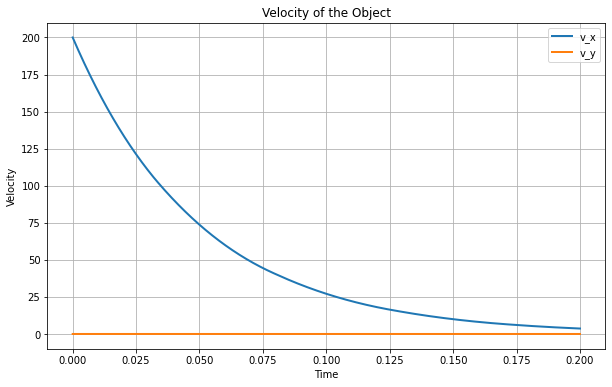

In [38]:

############################
##  Place the code below  ##
############################

def plot_velocity(positions, dt, linewidth = 2):
    """
    Plot velocity components and magnitude from 2D positions.

    Parameters
    ----------
    positions : np.ndarray
        Array of shape (2, T) representing x and y positions over time.
    dt : float
        Time step between consecutive measurements.
    """
    # Compute velocity (finite differences)
    velocity = np.diff(positions, axis=1) / dt  # shape (2, T-1)
    
    # Time axis for velocity (midpoints)
    T = positions.shape[1]
    time = np.arange(1, T) * dt

    # Velocity components
    vx, vy = velocity

    # Plot
    plt.figure(figsize=(10, 6))

    plt.plot(time, vx, label="v_x", linewidth = linewidth)
    plt.plot(time, vy, label="v_y", linewidth = linewidth)

    plt.xlabel("Time")
    plt.ylabel("Velocity")
    plt.title("Velocity of the Object")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_velocity(sol.y, dt)




# Simplified Stochastic Case

We know that a bee flight results from a dynamical interaction with a complex environment incorporating windy conditions, air frictions, ... One way to capture the complexity of this system without requiring complex and extensive physical equations is to incorporate noise in the system.

First, let's use the following approximation to incorpate noise in the system: 


\begin{equation}
\tag{3}
\frac{dX_t}{dt} = -\lambda (X_t-X^*) + \sigma \frac{dW_t}{dt} \approx -\lambda (X_t-X^*) + \sigma \times \text{white noise}

\end{equation}

# Exercise 2

#### **Q3** : Implement the model in the exact same way as before, and solve it by using the scipy function *solve_ivp()*.

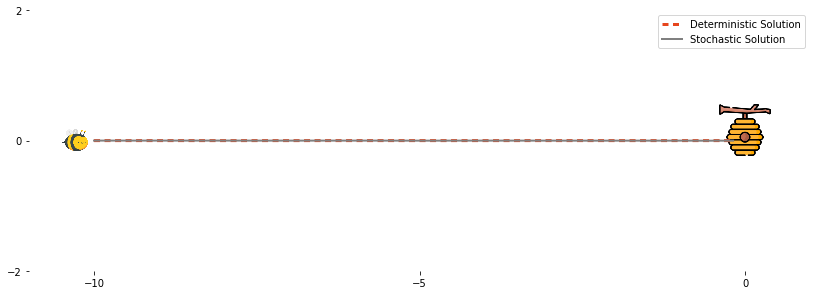

In [14]:
############################
## Complete the code below #
############################


def stochastic_dynamic(t, X):
    white_noise = np.random.normal()
    dX = -lambda_ * (X - x_r) + white_noise * sigma
    return dX

stoch_sol = solve_ivp(stochastic_dynamic, [0, T], X0, t_eval = np.linspace(0, T, N+1), method='RK45')


######### PLOTTING #########

fig,ax = plt.subplots(figsize=(14, 8))
add_image(plt.gca(), img_abeille, X0 - np.array([.3,0]), zoom=0.2)
add_image(plt.gca(), img_ruche, x_r+ np.array([0,.15]), zoom=0.4)
ax.plot(sol.y[0], sol.y[1], label="Deterministic Solution", lw=3,color = "#E6461E",linestyle =(0, (2,1.5)))
ax.plot(stoch_sol.y[0], stoch_sol.y[1], label="Stochastic Solution", lw=2,color = "grey")
ax.legend()
ax.set_aspect('equal')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_ylim(-2,2)
ax.set_xlim(-11,1)
ax.xaxis.set_visible(True)
ax.set_xticks([-10,-5,0])
ax.set_yticks([-2,0,2])
plt.show()


# Analytical Solution

#### **Q4** : Compute the analytical solution to (1)

HINT : compute $d(u(t,X_t))$ where $u(t,X_t) = e^{\lambda t}X_t$



$$
d\big(e^{\lambda t} X_t\big) = \lambda X_t e^{\lambda t}\,dt + e^{\lambda t}dX_t
$$

$$
d\big(e^{\lambda t} X_t\big) = \lambda X_t e^{\lambda t}\,dt + e^{\lambda t}(-\lambda (X_t-X^*) dt + \sigma dW_t)
$$

$$
d\big(e^{\lambda t} X_t\big) = e^{\lambda t}(\lambda X^* dt + \sigma dW_t)
$$

$$
e^{\lambda t} X_t - X_0 = \int_0^t e^{\lambda s}\lambda X^* ds + \int_0^t  e^{\lambda s} \sigma dW_s
$$

$$
X_t = e^{-\lambda t} X_0 + (1-e^{-\lambda t}) X^* +  \sigma \int_0^t e^{-\lambda (t-s)} dW_s
$$







#### **Q5** : Based on the analytical solution, how much time is needed to the bee to exaclty reach the hive ?

## Brownian Motion


The only difficulty is to compute $\int_0^t e^{-\lambda(t - s)}dW(s)$, which require more knowledge about Brownian motion

A **scalar standard Brownian motion** (or **standard Wiener process**) \( W(t) \) over the interval \([0, T]\) is a continuous-time stochastic process satisfying:

1. **Initial Value**:  
    W(0) = 0  (with probability 1)

2. **Normal Increments**:  
   For $( 0 \leq s < t \leq T )$, the increment  W(t) - W(s)  is normally distributed with 0 mean, and variance t-s : 
   $
   W(t) - W(s) \sim \mathcal{N}(0, t - s)$

3. **Independent Increments**:  
   For any non-overlapping intervals  [s, t] and  [u, v]  with $ 0 \leq s < t < u < v \leq T $, the increments  W(t) - W(s)  and  W(v) - W(u)  are independent.

---

### Discretized Brownian Motion

To simulate Brownian motion numerically, time is discretized into super small steps using:

- Time step: $\delta t = T / N $ for N large enough
- Time grid: $ t_j = j \delta t $ 
- Discrete Brownian motion: $ W_j = W(t_j) $

The process evolves via:

\begin{equation}
\tag{5}
W_j = W_{j-1} + dW_j, \quad j = 1, 2, \dots, N
\end{equation}

# Exercise 3A

#### **Q6** : Implement the analytical solution of the problem 

#### **Q7** : Then, compare the analytical solution with the stochastic approach used before. Why are they different ?


In [36]:
##### Analytical Solution ####

np.random.seed(2)
dW = np.random.normal(0,np.sqrt(dt), size=(N,2))

def analytical_solution(dW,N,T):

    ############################
    ## Complete the code below #
    ############################


    t = np.linspace(0, T, N)

    integral = np.zeros((N,2))
    for i in range(1, N):
        
        decay = np.exp(-lambda_ * (t[i] - t[:i]))[:, None]  
        integrand = decay * dW[:i]                         
        integral[i] = np.sum(integrand, axis=0)

    
    X = (
        X0[None, :] *  np.exp(-lambda_ * t).reshape(-1, 1) +
        x_r[None, :] * (1 -  np.exp(-lambda_ * t).reshape(-1, 1)) +
        sigma * integral
    )

    return X

true_sol = analytical_solution(dW,N,T=T)

######### PLOTTING #########

fig,ax = plt.subplots(figsize=(14, 8))
bee = add_image(plt.gca(), img_abeille, X0 - np.array([.3,0]), zoom=0.2)
add_image(plt.gca(), img_ruche, x_r+ np.array([0,.15]), zoom=0.4)
ax.plot(stoch_sol.y[0], stoch_sol.y[1], label="Stochastic Solution", lw=2,color = "grey")
ax.plot(true_sol[:,0],true_sol[:,1], label="Analytical Solution", lw=1, color = "#E6981E")
ax.plot(sol.y[0], sol.y[1], label="Deterministic Solution", lw=3,color = "#E6461E",linestyle =(0, (2,1.5)))

def update(frame):
    bee_pos = true_sol[frame]
    bee.xybox = bee_pos - np.array([0.3, 0])
    return [bee]

### Animate ###


ax.legend()
ax.set_aspect('equal')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_ylim(-2,2)
ax.set_xlim(-11,1)
ax.xaxis.set_visible(True)
ax.set_xticks([-10,-5,0])
ax.set_yticks([-2,0,2])
ani = FuncAnimation(fig, update, frames = np.arange(0, len(true_sol), 100), interval=30, blit=True)
plt.close(fig)
HTML(ani.to_html5_video())

#### **Q8** : Do you see any difference between the two simulations and the analytical solution ? Why ? 

# Exercise 3B

#### **Q9** : Once again, plot the cinematic (velocity profiles).

#### **Q10** : Explain the differences between these velocity profiles, and the ones from the deterministic solution

(20000, 2) 20000 1e-05


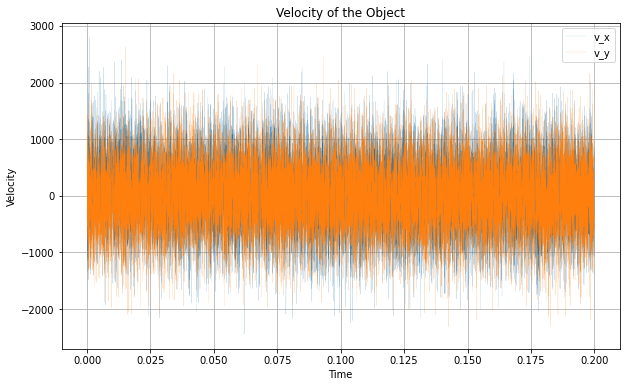

In [44]:

############################
##  Place the code below  ##
############################
T = .2
dt = 1e-5
N = int(T / dt)

print(true_sol.shape,N,dt)

true_sol = analytical_solution(dW,N,T=T)
plot_velocity(true_sol.T, T/N, linewidth = .1)





# Stochastic Numerical Methods

One of the issue with the previous formulation is that we are actually not allowed to write $\frac{dW(t)}{dt}$ since Brownian motion is nowhere differentiable with probability 1. 

To apply a numerical method on the following scalar autonomous stochastic differential equation

\begin{equation}
\tag{6}
dX(t) = f(X(t))dt + g(X(t)) dW(t), \quad X(0)=X_0, \quad 0\leq t \leq T ,
\end{equation}

which can be rewritten in the integral form 

\begin{equation}
\tag{7}
X(t) = X_0 + \int_0^t f(X(s))ds +\int_0^tg(X(s)) dW(s), \quad 0\leq t \leq T ,
\end{equation}

we need to discretize the interval.

Let $\Delta t = T/L$ for some positive integer L, and $\tau_j = j\Delta t$.

Practically, we already have a long serie of N discretized dW increments. 

\begin{equation}
\tag{8}
X(\tau_j) = X(\tau_{j-1}) + \int_{\tau_{j-1}}^{\tau_j} f(X(s))ds +\int_{\tau_{j-1}}^{\tau_j} g(X(s)) dW(s)
\end{equation}

The most known and common stochastic numerical method that solves the problem on the given discretization is called the **Euler-Maruyama Method** and takes the following form :
\begin{equation}
\tag{9}
X_j = X_{j-1} + f(X_{j-1})\Delta t + g(X_{j-1})\Delta W_{j-1}, \quad j = 1,2,...,L.
\end{equation}

Where $X_j$ denotes our numerical approximation to $X(\tau_j)$  



# Exercise 4

#### **Q11** : Apply the Euler-Maruyama Method to approximate the solution of the bee flight SDE

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def euler_maruyama(L,delta_W,dt):

    ############################
    ## Complete the code below #
    ############################

    X_em = np.zeros((L, 2))
    X_em[0] = X0
    for i in range(L-1):
        X_em[i + 1] = X_em[i] - lambda_ * (X_em[i] - x_r) * dt + sigma * delta_W[i]

    return X_em


def run_simulation(dt):

    L = int(T/dt)
    R = int(N/L)
    delta_W = dW.reshape(L, R, 2).sum(axis=1)

    X_em = euler_maruyama(L,delta_W,dt)

    ######### PLOTTING #########
    fig, ax = plt.subplots(figsize=(25, 12))
    add_image(plt.gca(), img_abeille, X0 - np.array([.3, 0]), zoom=0.2)
    add_image(plt.gca(), img_ruche, x_r + np.array([0, .15]), zoom=0.4)
    ax.plot(stoch_sol.y[0], stoch_sol.y[1], label="Stochastic Solution", lw=2, color="grey")
    ax.plot(true_sol[:, 0], true_sol[:, 1], label="Analytical Solution", lw=1, color="#E6981E")
    ax.plot(sol.y[0], sol.y[1], label="Deterministic Solution", lw=3, color="#E6461E", linestyle=(0, (2, 1.5)))
    ax.plot(X_em[:, 0], X_em[:, 1], label="Euler-Maruyama", lw=2, linestyle=(0, (2, 1.5)), color="#70E5FF")

    ax.legend()
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_ylim(-2, 2)
    ax.set_xlim(-11, 1)
    ax.set_xticks([-10, -5, 0])
    ax.set_yticks([-2, 0, 2])
    plt.show()

ui = HBox([dt_label, dt_slider])
out = interactive_output(run_simulation, {'dt': dt_slider})
display(ui,out)


Output()

#### **Q12** : What happens as you change the value of $\Delta t$  ? 

# Exercise 5A

#### **Q13** : Generate and plot K different trajectories using the Euler-Maruyama Method

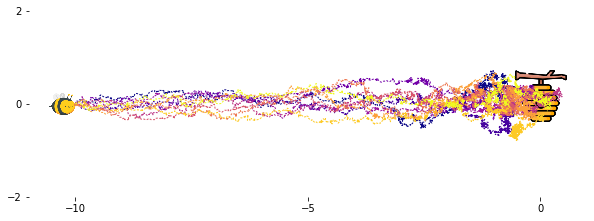

In [49]:
def run_K_simulation(K = 10):

    ############################
    ## Complete the code below #
    ############################


    dt = 1e-4

    L = int(T/dt)

    delta_W = np.random.normal(0,np.sqrt(dt),(K,L,2))

    trajectories = np.zeros((K,L,2))

    fig, ax = plt.subplots(figsize=(10, 6))

    colormap = plt.get_cmap("plasma", K)  
    colors = [colormap(i) for i in range(K)]

    for k in range(K):
        trajectories[k] = euler_maruyama(L,delta_W[k],dt)
        ax.plot(trajectories[k,:, 0],trajectories[k,:, 1], lw=1, linestyle=(0, (2, 1.5)), color=colors[k])
        
    ######### PLOTTING #########
    add_image(ax, img_abeille, X0 - np.array([.3, 0]), zoom=0.2)
    add_image(ax, img_ruche, x_r + np.array([0, .15]), zoom=0.4)

    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_ylim(-2, 2)
    ax.set_xlim(-11, 1)
    ax.set_xticks([-10, -5, 0])
    ax.set_yticks([-2, 0, 2])
    return trajectories

simulated_trajectories = run_K_simulation()

# Exercise 5B : 

#### **Q14** : Plot the average trajectory done by the bee

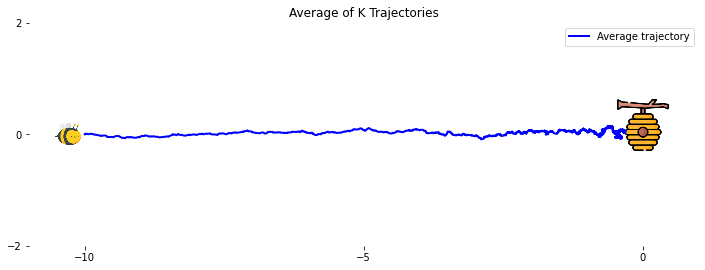

In [65]:
############################
## Complete the code below #
############################

def plot_average_trajectory(trajectories):
    """
    Plot the average trajectory from K trajectories.

    Parameters
    ----------
    trajectories : np.ndarray
        Array of shape (K, 2, T), where:
          - K = number of trajectories
          - 2 = (x, y) coordinates
          - T = number of timesteps
    """
    # Average over K trajectories → shape (2, T)

    avg_traj = trajectories.mean(axis=0)

    # Extract x(t) and y(t)
    x, y = avg_traj.T

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, label="Average trajectory", color="blue", linewidth=2)
    ax = plt.gca()
    add_image(ax, img_abeille, X0 - np.array([.3, 0]), zoom=0.2)
    add_image(ax, img_ruche, x_r + np.array([0, .15]), zoom=0.4)
    plt.title("Average of K Trajectories")
    plt.legend()
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_ylim(-2, 2)
    ax.set_xlim(-11, 1)
    ax.set_xticks([-10, -5, 0])
    ax.set_yticks([-2, 0, 2])
    plt.show()



plot_average_trajectory(simulated_trajectories)

# Exercise 5C

#### **Q15** : Is the average trajectory similar to the deterministic solution ? Prove it mathematically

**Note** : Use the following HINT (This will be rigorously proven later in the course)

$$\mathbb{E}(\int_0^t f(t) dW_t) = 0 $$

**Solution**

$$ \mathbb{E}[X_t] = \mathbb{E}[e^{-\lambda t} X_0 + (1-e^{-\lambda t}) X^* +  \sigma \int_0^t e^{-\lambda (t-s)} dW_s] $$

$$ \mathbb{E}[X_t] = e^{-\lambda t} X_0 + (1-e^{-\lambda t}) X^* +  \sigma \mathbb{E}[\int_0^t e^{-\lambda (t-s)} dW_s] $$

Using the HINT : $$ \mathbb{E}[X_t] = e^{-\lambda t} X_0 + (1-e^{-\lambda t}) X^*$$

# Strong Convergence of the Euler-Maruyama Method

In the example of **Exercise 4** , the Euler-Maruyama (EM) solution matches the true solution more closely as $\Delta t$ is decreased : **convergence** seems to take place.

However, since $X(\tau_n)$ and $X_n$ are *random variables*, we must define **how** to measure their difference to make the notion of convergence precise.

One natural choice is to use the expected value of the absolute difference:  
$$
\mathbb{E}|X_n - X(\tau_n)|
$$  
This leads to the concept of **strong convergence**.

A method is said to have **strong order of convergence** equal to $\gamma$ if there exists a constant $C$ such that:

$$
\mathbb{E}|X_n - X(\tau)| \leq C \, \Delta t^\gamma \tag{10}
$$

for any fixed $\tau = n \Delta t \in [0, T]$ and $\Delta t$ sufficiently small.

**Intuitively,**  the strong order of convergence measures the rate at which the “mean of
 the error” decays as $\Delta t → 0$.

---

If the drift $f$ and diffusion $g$ functions satisfy appropriate conditions, it can be shown that the **Euler-Maruyama method** has **strong order of convergence** $\gamma = \frac{1}{2}$.

This marks a key difference from the deterministic case : if $g \equiv 0$ and $X_0$ is constant, then the expectation can be dropped from the left-hand side of (10), and the inequality holds with $\gamma = 1$.

---

In our numerical experiments, we focus on the **error at the endpoint** $t = T$ since if the bound (10) holds at every fixed point in $[0, T]$, then it certainly holds at the endpoint.

We define the **strong error**:

$$
e_{\text{strong}}^{\Delta t} := \mathbb{E}|X_L - X(T)|, \quad \text{where } L \Delta t = T \tag{11}
$$

Hence, we expect:

$$
e_{\text{strong}}^{\Delta t} \leq C \, \Delta t^{1/2} \tag{12}
$$

for sufficiently small $\Delta t$.


# Exercise 6

#### **Q16** : Compute numerically the strong order of convergence of the Euler Maruyama method

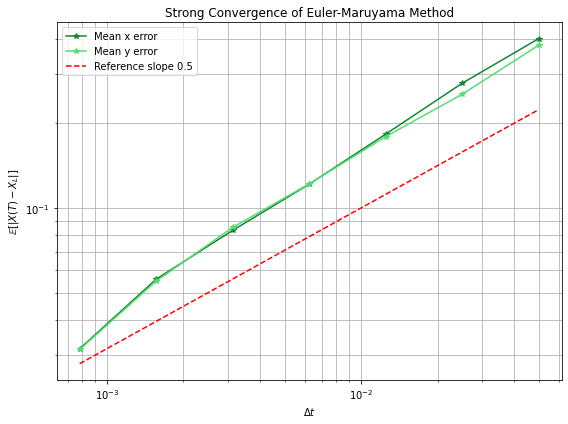

Estimated convergence rate in x coordinates: 0.5982
Estimated convergence rate in y coordinates: 0.5807
Residual of least squares fit in x coordinates: 1.2871e-01
Residual of least squares fit in y coordinates: 1.6002e-01


In [19]:
N = 2**9
K = 1000
dt = T/N
numof_discr = 7
Xerr = np.zeros((K, numof_discr,2))
dW = np.random.normal(0,np.sqrt(dt),(K,N,2))
Dtvals = dt*2**np.arange(1,numof_discr+1)

############################
## Complete the code below #
############################

for k in range(K):
    true_sol = analytical_solution(dW[k],N,.2)
    for p in range(numof_discr):
        R = 2**(p+1)
        Dt = Dtvals[p]
        L = N // R
        delta_W = dW[k].reshape(L, R, 2).sum(axis=1)
        Xtemp = euler_maruyama(L,delta_W,Dt)
        Xerr[k, p] = np.abs(Xtemp[-1] - true_sol[-1])
        

mean_errors = np.mean(Xerr, axis=0)

######### PLOTTING #########

plt.figure(figsize=(8, 6))
plt.loglog(Dtvals, mean_errors[:,0], color = "#0F872B", label='Mean x error',marker='*')
plt.loglog(Dtvals, mean_errors[:,1], color = "#52DE72", label='Mean y error',marker='*')
plt.loglog(Dtvals, Dtvals**0.5, 'r--', label='Reference slope 0.5')
plt.xlabel(r'$\Delta t$')
plt.ylabel(r'$\mathbb{E}[|X(T) - X_L|]$')
plt.title('Strong Convergence of Euler-Maruyama Method')
plt.grid(True, which="both")
plt.legend()
plt.tight_layout()
plt.show()

######### Least-Square fit #########

A = np.vstack([np.ones(numof_discr), np.log(Dtvals)]).T
rhs = np.log(mean_errors)
sol_x = np.linalg.lstsq(A, rhs[:,0], rcond=None)[0]
sol_y = np.linalg.lstsq(A, rhs[:,1], rcond=None)[0]
gamma_x = sol_x[1]
gamma_y = sol_y[1]
resid_x = np.linalg.norm(A @ sol_x - rhs[:,0])
resid_y = np.linalg.norm(A @ sol_y - rhs[:,1])

print(f"Estimated convergence rate in x coordinates: {gamma_x:.4f}")
print(f"Estimated convergence rate in y coordinates: {gamma_y:.4f}")
print(f"Residual of least squares fit in x coordinates: {resid_x:.4e}")
print(f"Residual of least squares fit in y coordinates: {resid_y:.4e}")

While monitoring the error $ e_{\text{strong}}^{\Delta t} $ we are implicitly assuming that a number of other sources of error are negligible, including the following:

- **Sampling error**: the error arising from approximating an expected value by a sampled mean.

- **Random number bias**: inherent errors in the random number generator.

- **Rounding error**: floating point roundoff errors.

For a typical computation the sampling error is likely to be the most significant of
 these three. In fact, the sampling error decays like $1/√M$, where M is the number of sample paths
 used. Therefore, it is required to have a sufficiently large number of sampled trajectories to compute the strong order of convergence.

 A less demanding alternative is to measure the rate of
 decay of the “error of the means” instead. This leads to the concept of weak convergence. 

# Weak Convergence of the Euler-Maruyama Method
A method is said to have **weak order of convergence** equal to $\gamma $ if there exists a constant $ C $ such that for all functions $ p $ in a certain class,

\begin{equation}
\tag{13}
\left| \mathbb{E}[p(X_n)] - \mathbb{E}[p(X(\tau))] \right| \leq C \Delta t^{\gamma}
\end{equation}

at any fixed $ \tau = n \Delta t \in [0, T] $, and for $ \Delta t $ sufficiently small.

Typically, the functions $ p $ allowed in this inequality must satisfy certain **smoothness** and **polynomial growth** conditions. 

Here, we will focus on the case where $ p $ is the **identity function**, i.e., $ p(x) = x $. 

For appropriate choices of the drift and diffusion functions $ f $ and $ g $, it can be shown that the **Euler–Maruyama (EM)** method achieves **weak order of convergence** $ \gamma = 1 $.

To assess this numerically, we define the **weak endpoint error** as:

\begin{equation}
\tag{14}
e_{\text{weak}}^{\Delta t} := \left| \mathbb{E}[X_L] - \mathbb{E}[X(T)] \right|, \quad \text{where } L \Delta t = T
\end{equation}

So, if inequality (13) holds for $ p(X) \equiv X $ with $ \gamma = 1 $, then it immediately implies that:

\begin{equation}
\tag{15}
e_{\text{weak}}^{\Delta t} \leq C \Delta t
\end{equation}

for sufficiently small $ \Delta t $.

# Exercise 7

#### **Q17** : Compute numerically the weak order of convergence of the Euler Maruyama method

[[0.00368638 0.00403427]
 [0.0112846  0.01166696]
 [0.01475516 0.01405516]
 [0.01996385 0.02094039]
 [0.11034348 0.10975678]]


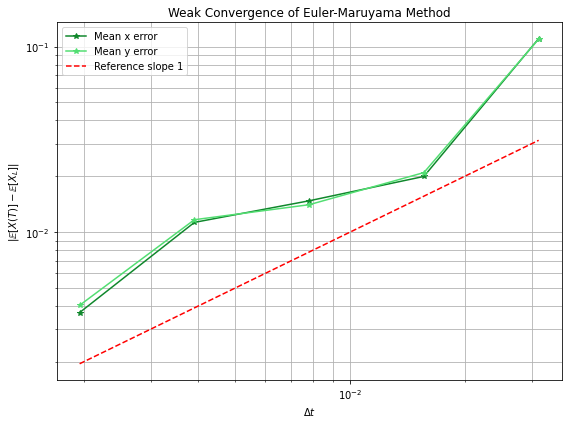

Estimated convergence rate in x coordinates: 1.0630
Estimated convergence rate in y coordinates: 1.0376
Residual of least squares fit in x coordinates: 7.8668e-01
Residual of least squares fit in y coordinates: 7.7176e-01


In [20]:
K = int(1e5)
dt = T/N
x_r = np.array([0,10])

numof_discr = 5

Dtvals = 2.00 ** (np.arange(0, numof_discr) - 9)

############################
## Complete the code below #
############################

E_XT = X0 * np.exp(-lambda_ * T) + x_r * (1 - np.exp(-lambda_ * T))
X_em = np.zeros((numof_discr,2))

for p in range(numof_discr):
    Dt = 2 ** (p - 9)     
    L = int(T / Dt)        
    
    X_temp = X0*np.ones((K,2))
    for i in range(L-1):
        Winc = np.sqrt(Dt) * np.random.normal(0,1,(K,2))
        X_temp = X_temp - lambda_ * (X_temp - x_r) * Dt + sigma * Winc

    X_em[p] = np.mean(X_temp,axis = 0)


mean_errors = np.abs(X_em - E_XT)
print(mean_errors)

######### PLOTTING #########

plt.figure(figsize=(8, 6))
plt.loglog(Dtvals, mean_errors[:,0], color = "#0F872B", label='Mean x error',marker='*')
plt.loglog(Dtvals, mean_errors[:,1], color = "#52DE72", label='Mean y error',marker='*')
plt.loglog(Dtvals, Dtvals, 'r--', label='Reference slope 1')
plt.xlabel(r'$\Delta t$')
plt.ylabel(r'$|\mathbb{E}[X(T)] - \mathbb{E}[X_L]|$')
plt.title('Weak Convergence of Euler-Maruyama Method')
plt.grid(True, which="both")
plt.legend()
plt.tight_layout()
plt.show()

######### Least-Square fit #########

A = np.vstack([np.ones(numof_discr), np.log(Dtvals)]).T
rhs = np.log(mean_errors)
sol_x = np.linalg.lstsq(A, rhs[:,0], rcond=None)[0]
sol_y = np.linalg.lstsq(A, rhs[:,1], rcond=None)[0]
gamma_x = sol_x[1]
gamma_y = sol_y[1]
resid_x = np.linalg.norm(A @ sol_x - rhs[:,0])
resid_y = np.linalg.norm(A @ sol_y - rhs[:,1])

print(f"Estimated convergence rate in x coordinates: {gamma_x:.4f}")
print(f"Estimated convergence rate in y coordinates: {gamma_y:.4f}")
print(f"Residual of least squares fit in x coordinates: {resid_x:.4e}")
print(f"Residual of least squares fit in y coordinates: {resid_y:.4e}")

# Exercise 8

#### **Q18** : Create your application of the Euler Maruyama method.

1) Find a simple Stochastic differential Equation on any application you want

2) Apply the Euler Maruyama Method to compute a numerical approximation of the solution 

3) Show the different solutions for different timesteps

4) Make beautiful plots illustrating your application